Задача 1

Строим случайную марковскую сеть

Экспериментируем

Составляем график, показывающий, с какой вероятностью (частотой) на i-й итерации система находилась в каждом из состояний

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# число состояний
N = 4

При генерации матрицы вероятностей переходов должно выполняться условие: сумма вероятностей перехода из текущего состояния в другие равна 1

In [ ]:
connections = np.random.randint(0,2,size = (N,N)) # матрица, характеризующая
                                                  # наличие или отсутствие
                                                  # направленных связей между
                                                  # состояниями
for i in range(0, N):
  connections[i][i] = 1          # каждое состояние связано с самим собой

probabilities = np.zeros((N, N)) # матрица вероятностей переходов между состояниями

for i in range(0, N):
  connections_i = connections[i] # строка наличия связей i-го состояния с другими
  num_of_connections = sum(x != 0 for x in connections_i) # число связей i-го
                                                          # состояния с другими
  temp_probs = np.random.rand(num_of_connections) # вероятности переходов
  temp_probs_sum = sum(temp_probs)
  temp_probs_norm = temp_probs / temp_probs_sum # нормируем, сумма вероятностей
                                                # будет равна 1

  k = 0
  for j in range(0, N):       # заполняем матрицу вероятностей
    if connections_i[j] != 0:
      probabilities[i][j] = temp_probs_norm[k]
      k += 1

In [ ]:
print(connections)
print(probabilities)

[[1 1 1 0]
 [1 1 0 0]
 [0 1 1 1]
 [0 0 1 1]]
[[0.45967317 0.29646229 0.24386454 0.        ]
 [0.42941712 0.57058288 0.         0.        ]
 [0.         0.77213285 0.09357791 0.13428924]
 [0.         0.         0.40568057 0.59431943]]


In [ ]:
initial_state = 0 # исходное состояние

In [ ]:
# число повторений эксперимента
num_of_experiments = 100
# число итераций (передвижений по стостояниям системы)
num_of_movements = 100

In [ ]:
# подсчет числа нахождений системы в каждом из состояний
states_count = np.zeros(N)
# подсчет числа нахождений системы в каждом из состояний при различных итерациях
states_count_for_iteration = np.zeros((N, num_of_movements))

for i in range(0, num_of_experiments): # эксперименты
  state = initial_state
  for j in range(0, num_of_movements):
    res = random.random()
    k = 0 # состояние, в которое переходим
    while res > 0 and k < N:
      if res < probabilities[state][k]:
        res = 0
      else:
        res -= probabilities[state][k]
        k += 1
    state = k
    states_count[state] += 1
    states_count_for_iteration[state][j] += 1

In [ ]:
print(states_count)

[3734. 4641. 1222.  403.]


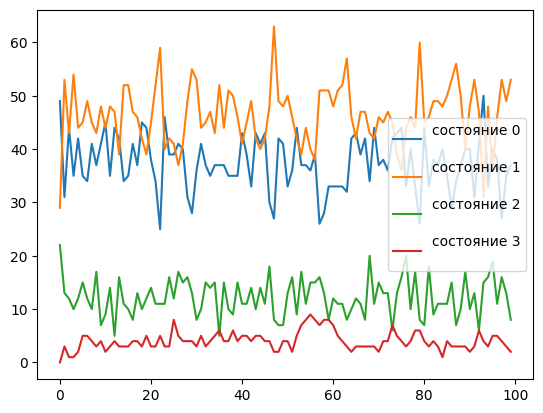

In [ ]:
x = np.arange(0, num_of_movements)
for i in range(0, N):
  plt.plot(x, states_count_for_iteration[i],label="состояние %d\n" % i)

plt.legend()

Задача 2

Определить вероятность попадания марковской цепи в одно из двух терминальных состояний при различных первоначальных состояниях

In [ ]:
import random

In [ ]:
N = 10                    # число состояний
left_state = 0            # самое "левое" состояние
right_state = N - 1       # самое "правое" состояние
count_left_state = 0
count_right_state = 0
p = 1/2                    # вероятность движения "вверх"/"влево" по цепи состояний
q = 1 - p                  # вероятность движения "вниз"/"вправо" по цепи состояний
num_of_experiments = 100   # число повторений эксперимента

In [ ]:
# исходное состояние
initial_state = 1

In [ ]:
count_left_state = 0
count_right_state = 0
for i in range(0, num_of_experiments): # эксперименты
  state = initial_state
  while (state > left_state and state < right_state):
    res = random.random()
    if res < p:
      state -= 1
    else:
      state += 1
  if state == left_state:
    count_left_state += 1
  else:
    count_right_state += 1

In [ ]:
print("Вероятность оказаться в левом положении: ", count_left_state/float(num_of_experiments))
print("Вероятность оказаться в правом положении: ", count_right_state/float(num_of_experiments))

Вероятность оказаться в левом положении:  0.94
Вероятность оказаться в правом положении:  0.06


100
0


Задача 3

